### Reunião para analises de dados sobre cancelamento de clientes.

    No mundo atual, o fenômeno da Internet assume importantes posições no estabelecimento do retorno esperado a longo prazo. Pensando mais a longo prazo, a revolução dos costumes não pode mais se dissociar dos paradigmas corporativos. As experiências acumuladas demonstram que a hegemonia do ambiente político talvez venha a ressaltar a relatividade das condições financeiras e administrativas exigidas. No entanto, não podemos esquecer que a percepção das dificuldades desafia a capacidade de equalização dos procedimentos normalmente adotados.

    Por outro lado, a complexidade dos estudos efetuados é uma das consequências das diretrizes de desenvolvimento para o futuro. Acima de tudo, é fundamental ressaltar que o entendimento das metas propostas representa uma abertura para a melhoria das regras de conduta normativas. É claro que a expansão dos mercados mundiais auxilia a preparação e a composição dos conhecimentos estratégicos para atingir a excelência.
    
![Os 6 principais tipos de clientes e como lidar com cada um deles - Capa.png](<attachment:Os 6 principais tipos de clientes e como lidar com cada um deles - Capa.png>)
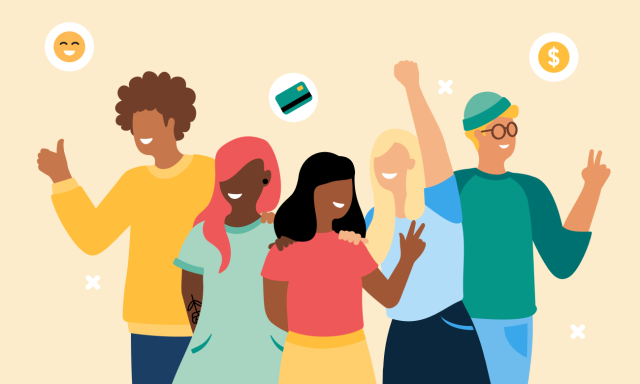

## Trazendo os dados do _dataset_ para o __notebook:__

In [ ]:
import pandas as pd
# lê os dados da tabela
tabela = pd.read_csv('cancelamentos.csv')
# mostra os dados da tabela na tela 
display(tabela)


## Agora vou eliminar da consulta dados desnecessarios. Vou eliminar o id do usúario.

In [ ]:
tabela = tabela.drop('CustomerID', axis=1)
display(tabela)

## Vamos descobrir quantas linhas com informações vazias nós temos.

In [ ]:
display(tabela.info())

## Vamos eliminar as células vazias da nossa consulta.

In [ ]:
tabela = tabela.dropna()
display(tabela.info())

## Vamos contar quantos usuários __cancelaram__, e quantos __não__ __cancelaram__

In [ ]:
display(tabela['cancelou'].value_counts())

## Traduzindo para porcetagem:

In [ ]:
display(tabela['cancelou'].value_counts(normalize=True).map('{:.2%}'.format))

Próxima análise de dados vai ser para verificar a duração dos contratos

In [ ]:
display(tabela.groupby('duracao_contrato').mean(numeric_only=True))

## Vamos elimina os dados dos contratos mensais.

In [ ]:
tabela = tabela[tabela['duracao_contrato'] != 'Monthly']
display(tabela)
display(tabela['cancelou'].value_counts())
display(tabela['cancelou'].value_counts(normalize=True).map('{:2%}'.format))

Vamos dar uma olhada nos tipos de assinaturas:

In [ ]:
display(tabela['assinatura'].value_counts(normalize=True).map('{:.2%}'.format))
display(tabela.groupby('assinatura').mean(numeric_only=True))

Vamos passar a analisar os dados das assinaturas olhando os gráficos de cada coluna:

In [ ]:
import plotly.express as px
for coluna in tabela.columns:
    grafico = px.histogram(tabela, x=coluna, color='cancelou', width=600)
    grafico.show()

Achamos as anomalias: ligações para  call center e dias de atraso. Os cliente com mais de 20 dias de atraso cancelaram as assinaturas, enquanto que os clientes que fizeram mais de 5 ligações para o call center, todos cancelaram as suas assinaturas.

In [ ]:
tabela = tabela[tabela['ligacoes_callcenter'] < 5]
tabela = tabela[tabela['dias_atraso'] <= 20]

display(tabela)
display(tabela['cancelou'].value_counts())
display(tabela['cancelou'].value_counts(normalize=True).map('{:.2%}'.format))